In [81]:
#import necessary libraries
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
#view available tables
database = 'attr_data.db'
sqlconnection = sql.connect(database)
sql_query1 = """SELECT name FROM sqlite_master WHERE type = 'table';"""
cursor = sqlconnection.cursor()
cursor.execute(sql_query1)
print(cursor.fetchall())

[('attrition_records',), ('sqlite_sequence',)]


In [68]:
#extract data in table
database = 'attr_data'
connection = sql.connect(database)
sql_query = '''SELECT * FROM attrition_records'''
df = pd.read_sql_query(sql_query, sqlconnection)

In [70]:
df.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EmployeeNumber            1470 non-null   int64 
 11  EnvironmentSatisfaction   1470 non-null   int64 
 12  Gender                    1470 non-null   object
 13  HourlyRate                1470 non-null   int64 
 14  JobInvolvement          

In [110]:
#null values
df.isnull() . sum()

id                          0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [111]:
#column labels
df.columns

Index(['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [106]:
#convert data types
df["Attrition"] = df["Attrition"].astype('category').cat.codes
df["BusinessTravel"] = df["BusinessTravel"].astype('category').cat.codes
df["Department"] = df["Department"].astype('category').cat.codes
df["EducationField"] = df["EducationField"].astype('category').cat.codes
df["Gender"] = df["Gender"].astype('category').cat.codes
df["JobRole"] = df["JobRole"].astype('category').cat.codes
df["MaritalStatus"] = df["MaritalStatus"].astype('category').cat.codes
df["Over18"] = df["Over18"].astype('category').cat.codes
df["OverTime"] = df["OverTime"].astype('category').cat.codes
df

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,2,1102,2,1,2,1,1,...,1,80,0,8,0,1,6,4,0,5
1,2,49,0,1,279,1,8,1,1,1,...,4,80,1,10,3,3,10,7,1,7
2,3,37,1,2,1373,1,2,2,4,1,...,2,80,0,7,3,3,0,0,0,0
3,4,33,0,1,1392,1,3,4,1,1,...,3,80,0,8,3,3,8,7,3,0
4,5,27,0,2,591,1,2,1,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,36,0,1,884,1,23,2,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,1467,39,0,2,613,1,6,1,3,1,...,1,80,1,9,5,3,7,7,1,7
1467,1468,27,0,2,155,1,4,3,1,1,...,2,80,1,6,0,3,6,2,0,3
1468,1469,49,0,1,1023,2,2,3,3,1,...,4,80,0,17,3,2,9,6,0,8


In [108]:
#remove redundant colums
mf = df.drop(['id', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'], axis=1)

<AxesSubplot:>

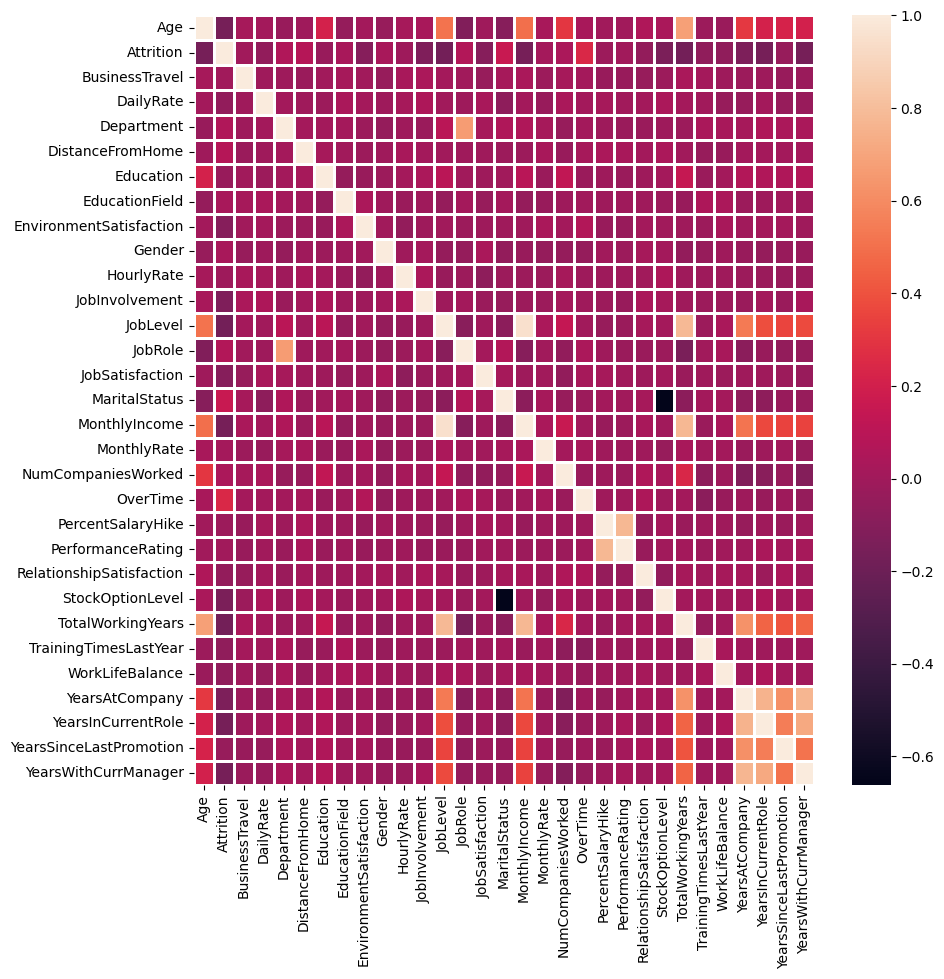

In [109]:
#factors affecting attrition
corr = mf.corr("pearson")
plt.figure(figsize = (10,10))
sns.heatmap(corr, linewidth = 1)

In [80]:
#relationship between education and Monthly income
df['Education'].corr(df['MonthlyIncome'])

0.09496067704188885

<AxesSubplot:xlabel='Age', ylabel='Count'>

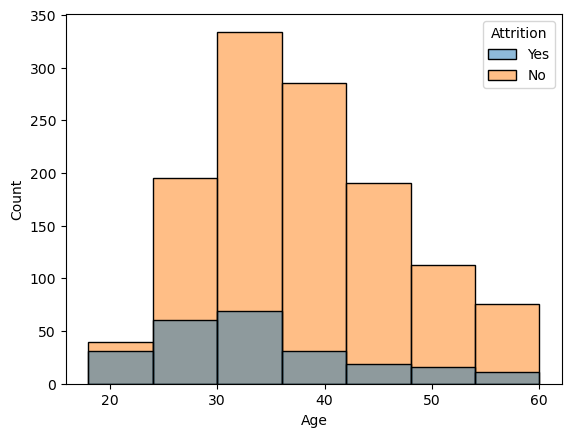

In [87]:
#effect of age on attrition
plt.figure()
sns.histplot(x = df['Age'], bins = 7, hue = df['Attrition'])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Count'>

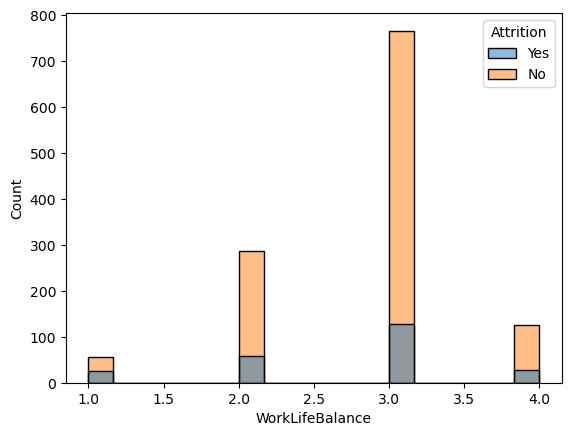

In [89]:
#worklife vs attrition
"""
WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
"""plt.figure()
sns.histplot(x = df['WorkLifeBalance'], hue = df['Attrition'])